In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = pd.read_csv("AmesHousing.tsv", sep= '\t')

print(data.head())

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour    ...     Pool Area Pool QC  Fence  \
0   NaN       IR1          Lvl    ...             0     NaN    NaN   
1   NaN       Reg          Lvl    ...             0     NaN  MnPrv   
2   NaN       IR1          Lvl    ...             0     NaN    NaN   
3   NaN       Reg          Lvl    ...             0     NaN    NaN   
4   NaN       IR1          Lvl    ...             0     NaN  MnPrv   

  Misc Feature Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0          NaN        0       5    20

In [169]:
data.shape

(2930, 82)

1) Create a function named transform_features() that, for now, just returns the train data frame.

2) Create a function named select_features() that, for now, just returns the Gr Liv Area and SalePrice columns from the train data frame.

3) Create a function named train_and_test() 

Selects the first 1460 rows from from data and assign to train.
Selects the remaining rows from data and assign to test.
Trains a model using all numerical columns except the SalePrice column (the target column) from the data frame returned from select_features()
Tests the model on the test set and returns the RMSE value.

In [170]:
def transform_features(frame):
    train = frame.loc[:1500]
    return train

In [171]:
train = transform_features(data)
train.shape

(1501, 82)

In [172]:
def select_features(frame):
    
    temp = frame.isna().sum()
    temp2 = temp[(temp > 0) & (temp < 0.05*len(frame))].index
    frame[temp2] = frame[temp2].fillna(frame[temp2].mean())
    frame['years_since_remod'] = frame['Yr Sold'] - frame['Year Remod/Add']
    
    dummies = pd.get_dummies(frame['MS Zoning'],prefix_sep='_')
    frame2 = pd.concat([frame, dummies], axis=1)
    
    res = frame2[['RM','RL','years_since_remod','Gr Liv Area','SalePrice']]
    return res

In [173]:
train_columns = select_features(train)
print(train_columns.head())

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



   RM  RL  years_since_remod  Gr Liv Area  SalePrice
0   0   1                 50         1656     215000
1   0   0                 49          896     105000
2   0   1                 52         1329     172000
3   0   1                 42         2110     244000
4   0   1                 12         1629     189900


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Testing

train_new = data[:1460]
print(len(train_new))

temp = train_new.dtypes == object

train_new[temp].info()

Correlation

In [174]:
train_new = data[:1460]
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
Order              1460 non-null int64
PID                1460 non-null int64
MS SubClass        1460 non-null int64
MS Zoning          1460 non-null object
Lot Frontage       1211 non-null float64
Lot Area           1460 non-null int64
Street             1460 non-null object
Alley              109 non-null object
Lot Shape          1460 non-null object
Land Contour       1460 non-null object
Utilities          1460 non-null object
Lot Config         1460 non-null object
Land Slope         1460 non-null object
Neighborhood       1460 non-null object
Condition 1        1460 non-null object
Condition 2        1460 non-null object
Bldg Type          1460 non-null object
House Style        1460 non-null object
Overall Qual       1460 non-null int64
Overall Cond       1460 non-null int64
Year Built         1460 non-null int64
Year Remod/Add     1460 non-null int64
Roof Style         14

Dummy variables

In [175]:
dummies = pd.get_dummies(train_new['MS Zoning'],prefix_sep='_')
train_new = pd.concat([train_new, dummies], axis=1)

print(train_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 88 columns):
Order              1460 non-null int64
PID                1460 non-null int64
MS SubClass        1460 non-null int64
MS Zoning          1460 non-null object
Lot Frontage       1211 non-null float64
Lot Area           1460 non-null int64
Street             1460 non-null object
Alley              109 non-null object
Lot Shape          1460 non-null object
Land Contour       1460 non-null object
Utilities          1460 non-null object
Lot Config         1460 non-null object
Land Slope         1460 non-null object
Neighborhood       1460 non-null object
Condition 1        1460 non-null object
Condition 2        1460 non-null object
Bldg Type          1460 non-null object
House Style        1460 non-null object
Overall Qual       1460 non-null int64
Overall Cond       1460 non-null int64
Year Built         1460 non-null int64
Year Remod/Add     1460 non-null int64
Roof Style         14

In [176]:
corr = train_new[['C (all)','FV','I (all)','RH','RL','RM','Low Qual Fin SF','Pool Area','Lot Area','Gr Liv Area','SalePrice']].corr()
print(corr)

                  C (all)        FV   I (all)        RH        RL        RM  \
C (all)          1.000000 -0.020389 -0.002174 -0.007236 -0.151597 -0.036096   
FV              -0.020389  1.000000 -0.006428 -0.021391 -0.448174 -0.106713   
I (all)         -0.002174 -0.006428  1.000000 -0.002281 -0.047791 -0.011379   
RH              -0.007236 -0.021391 -0.002281  1.000000 -0.159051 -0.037871   
RL              -0.151597 -0.448174 -0.047791 -0.159051  1.000000 -0.793450   
RM              -0.036096 -0.106713 -0.011379 -0.037871 -0.793450  1.000000   
Low Qual Fin SF  0.082178 -0.023310 -0.002486 -0.008272 -0.074037  0.083691   
Pool Area       -0.002174 -0.006428 -0.000685 -0.002281  0.014342 -0.011379   
Lot Area        -0.022490 -0.115608  0.043619 -0.032284  0.243875 -0.198268   
Gr Liv Area     -0.076062  0.044944 -0.038039 -0.028840  0.116440 -0.135967   
SalePrice       -0.119552  0.134572 -0.040757 -0.058859  0.242141 -0.320506   

                 Low Qual Fin SF  Pool Area  Lot Ar

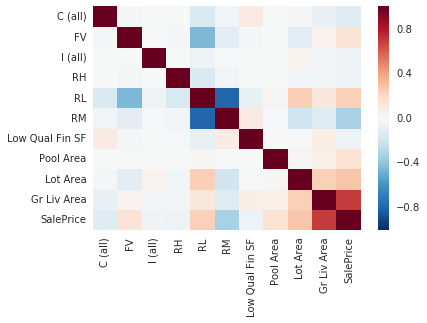

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(corr)

MS Zoning_RM, MS Zoning_RL, Gr Liv Area, Lot Area seem to be most correlated with SalePrice. 

In [178]:
def train_and_test(data, k):
    if k == 0:
        train = data[:1460]
        test = data[1460:]
    
        train_select = select_features(train)
        test_select = select_features(test)
   
        x_train = train_select.iloc[:,:-1]
        y_train = train_select.iloc[:,-1]
        
        x_test = test_select.iloc[:,:-1]
        y_test = test_select.iloc[:,-1]
    
        lr = LinearRegression()
    
        lr.fit(X=x_train, y=y_train)
        predictions = lr.predict(x_test)
    
        mse = mean_squared_error(predictions, y_test)
        rmse = np.sqrt(mse)
        return rmse
    
    elif k == 1:
        data = data.sample(frac=1).reset_index(drop=True)
        fold_one = data[:1460]
        fold_two = data[1460:]
        
        rmses = []
        
        # training on fold 1
        
        fold_one_select = select_features(fold_one)
        fold_two_select = select_features(fold_two)
        x_train = fold_one_select.iloc[:,:-1]
        y_train = fold_one_select.iloc[:,-1]
        x_test = fold_two_select.iloc[:,:-1]
        y_test = fold_two_select.iloc[:,-1]
    
        lr = LinearRegression()
        lr.fit(X=x_train, y=y_train)
        predictions = lr.predict(x_test)
    
        mse = mean_squared_error(predictions, y_test)
        rmse = np.sqrt(mse)
        rmses.append(rmse)
        
        # training on fold 2
        
        x_train = fold_two_select.iloc[:,:-1]
        y_train = fold_two_select.iloc[:,-1]
        x_test = fold_one_select.iloc[:,:-1]
        y_test = fold_one_select.iloc[:,-1]
    
        lr = LinearRegression()
        lr.fit(X=x_train, y=y_train)
        predictions = lr.predict(x_test)
    
        mse = mean_squared_error(predictions, y_test)
        rmse = np.sqrt(mse)
        rmses.append(rmse)
        
        # return the average rmse
        
        rmse = np.mean(rmses)
        
        return rmse
    elif k > 1:
        from sklearn.model_selection import KFold
        from sklearn.model_selection import cross_val_score
        
        kf = KFold(n_splits=k)
        model = LinearRegression()
       
        data_select = select_features(data)
    
        X = data_select.iloc[:,:-1]
        Y = data_select.iloc[:,-1]
        
        rmse = cross_val_score(model, X, Y, scoring='neg_mean_squared_error',
                         cv=kf)
        
        return np.mean(np.sqrt(-rmse))

In [179]:
rmse = train_and_test(data, 5)
print(rmse)

48927.14666867892


Testing out k=0, k=1, k>1, it seems like k>1 yields the lowest rmse - the best model.